<h1 style="
    font-size: 50px; 
    background-color: #1a2a36;
    color: #4fd1c5;
    font-family: 'Trebuchet MS', sans-serif; 
    font-weight: bold; 
    transform: skew(-10deg); 
    text-align: center; 
    padding: 20px 0;
    border-radius: 8px;
    border-left: 5px solid #4fd1c5;
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);   
">
    Dimentionality Reduction & SVM Model
</h1>

<h1 style="
    font-size: 30px;
    background-color: #1a2a36;
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Libraries</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

<h1 style="
    font-size: 30px;
    background-color: #1a2a36;
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
    Importing Data
</h1>

In [2]:
data = pd.read_csv(r'diabetes_after_clean.csv')
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69052,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
69053,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
69054,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
69055,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [3]:
# Divide Data to Features & Target
x, y = data.iloc[:, 1:], data.iloc[:,0]

# Remove Dublicated Records in Features and the Corresponding Records in Target
x_duplicated = x.duplicated()
y = y.iloc[[i for i in range(len(y)) if not x_duplicated[i]]]
x.drop_duplicates(inplace=True)

C:\Users\ys959\AppData\Local\Temp\ipykernel_1456\4051800910.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop_duplicates(inplace=True)


<h1 style="
    font-size: 30px;
    background-color: #1a2a36;
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Feature Selection</h1>

<h1 style="
    font-size: 16px;
    background-color:rgba(255, 255, 255, 0.07);
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    text-align: center;
    padding: 10px;
    font-weight: bold;
    margin: 0px;
    border-radius: 8px;  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Correlation Feature Selection
</h1>

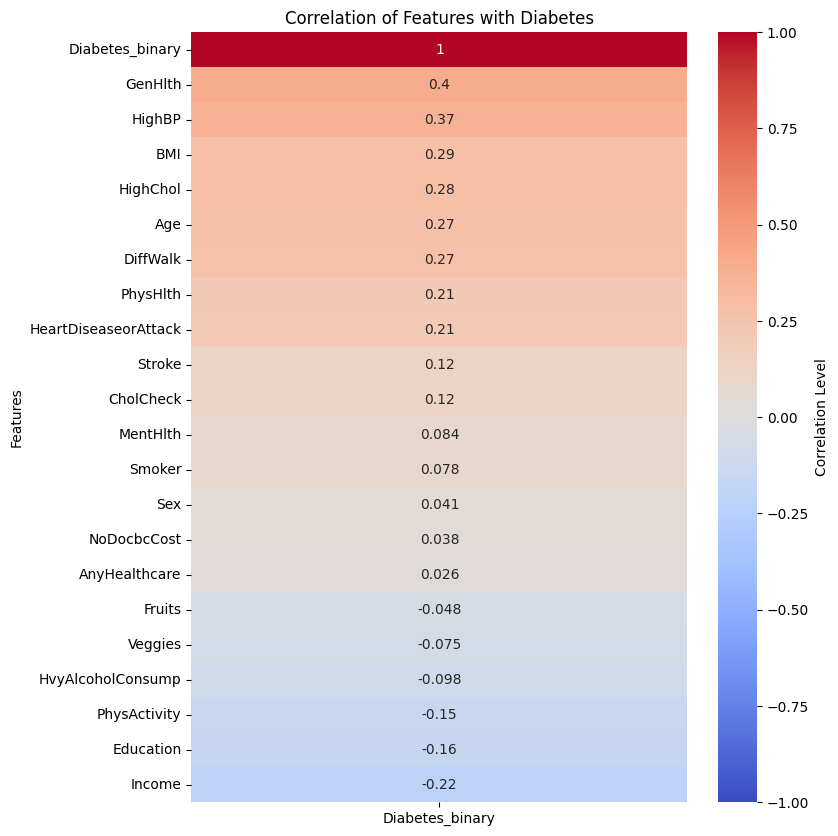

In [4]:
corr_mat = x.join(y).corr()

plt.figure(figsize=(8, 10))
sns.heatmap(corr_mat[[y.name]].sort_values(by=y.name, ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation Level'})
plt.title('Correlation of Features with Diabetes')
plt.ylabel('Features')
plt.show()

In [5]:
# Remove Features with Low Correlation Between 0.01 and -0.01 with Target
removable_features = []

threshold = 0.01

if removable_features: removable_features.append(*[col for col in corr_mat[y.name].index if abs(corr_mat[y.name][col]) < threshold])
removable_features

[]

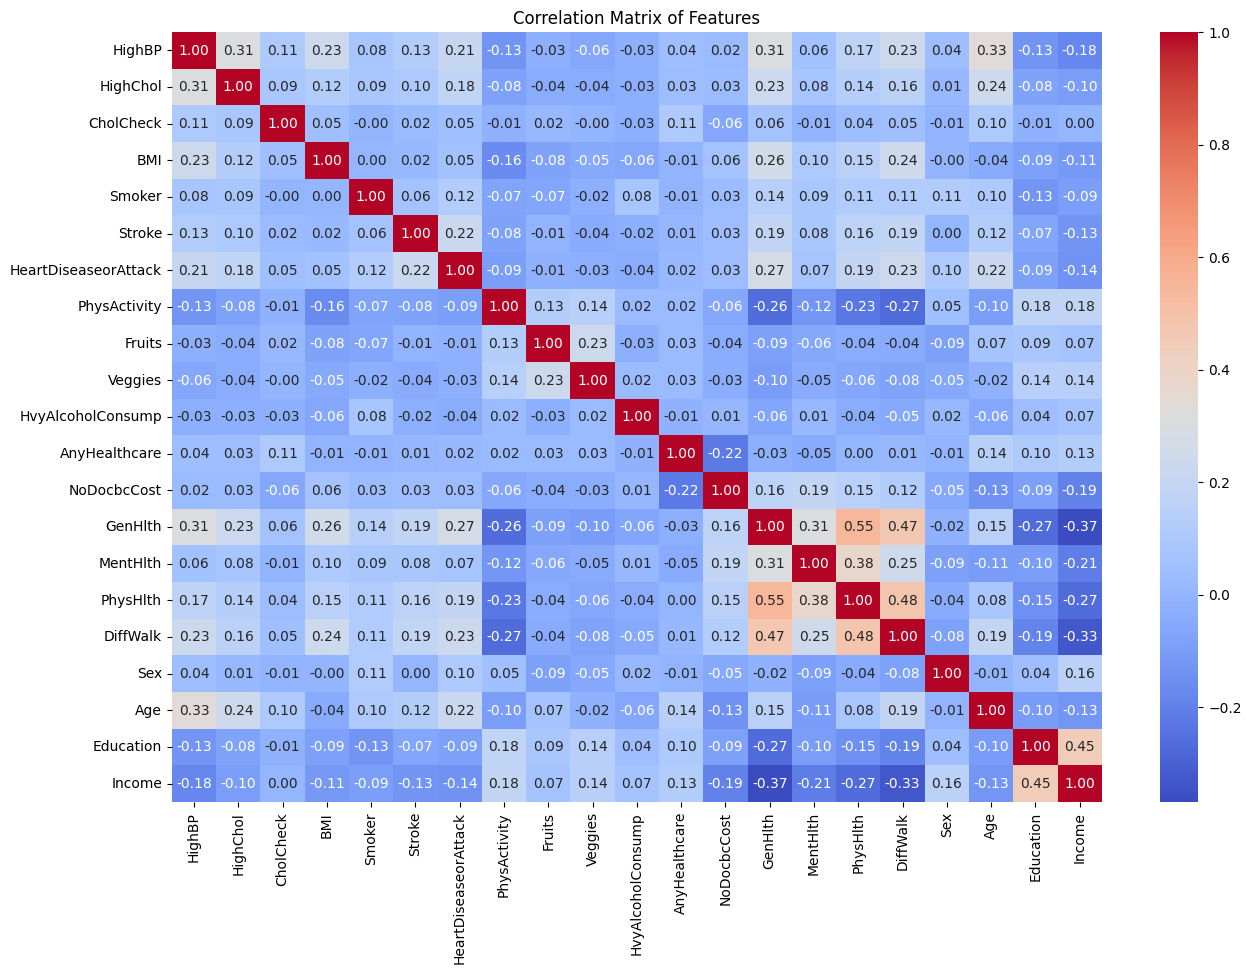

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(x.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [7]:
# Remove Columns with high Correlation within Features
threshold = 0.9

for row in corr_mat.index:
    for col in corr_mat.columns:
        if row != col and row != y.name and col != y.name and col not in removable_features and abs(corr_mat[row][col]) > threshold:
            removable_features.append(col if corr_mat[y.name][col] < corr_mat[y.name][row] else row)

removable_features = {*removable_features}
removable_features

set()

In [8]:
# Remove Features with Low Impact on Target
x_reduced = x.drop(columns=removable_features)

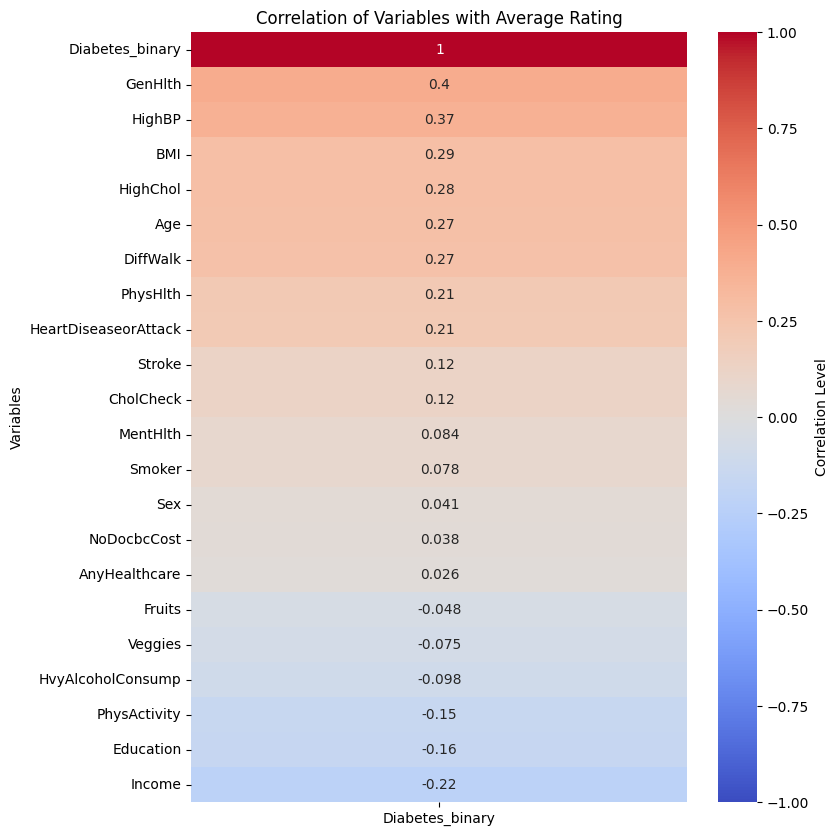

In [9]:
plt.figure(figsize=(8, 10))
sns.heatmap(x_reduced.join(y).corr()[[y.name]].sort_values(by=y.name, ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation Level'})
plt.title('Correlation of Variables with Average Rating')
plt.ylabel('Variables')
plt.show()

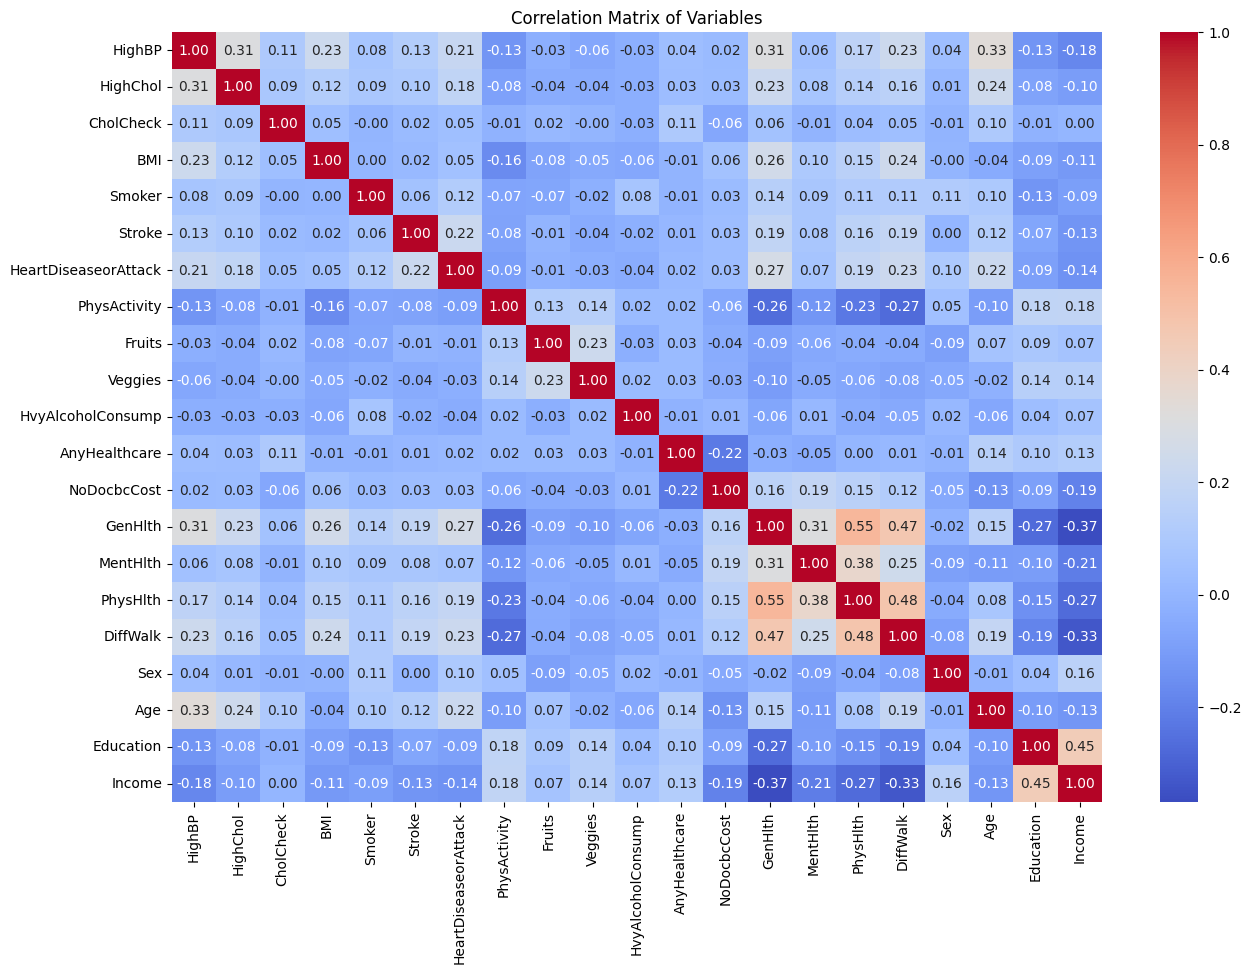

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(x_reduced.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

<h1 style="
    font-size: 16px;
    background-color:rgba(255, 255, 255, 0.07);
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    text-align: center;
    padding: 10px;
    font-weight: bold;
    margin: 0px;
    border-radius: 8px;  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Backward Feature Selection
</h1>

In [11]:
# Scale Data, Because ML Models are Sensitive
x_scaled = pd.DataFrame(MinMaxScaler().fit_transform(x_reduced), columns=x_reduced.columns)

# Split Data to Train & Test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression Model for Faster Computation Time
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100: .2f}%")

Accuracy:  74.95%


In [12]:
# Backward Feature Selection
threshold = 0.0001
removable_features = []

for feature in x_reduced.columns:
    # Create Dataset Without This Feature
    x_train_sub = x_train.drop(columns=[feature])
    x_test_sub = x_test.drop(columns=[feature])

    # Train Model After Removing This Feature
    model.fit(x_train_sub, y_train)

    # Compute New Accuracy
    y_pred = model.predict(x_test_sub)
    new_accuracy = accuracy_score(y_test, y_pred)

    # Add Feature to Remove List If Accuracy Drop is Within the Threshold
    if accuracy - new_accuracy < threshold:
        removable_features.append(feature)

removable_features

['PhysActivity', 'Fruits', 'DiffWalk']

In [13]:
# Remove Features with low Impact on Target for More Computation Efficiency
x_reduced.drop(columns=removable_features, inplace=True)

# Remove Duplicated Resulted After Removing Some Features
x_duplicated = x_reduced.duplicated()
y_reduced = y.iloc[[i for i in range(len(y)) if not x_duplicated.iloc[i]]]
x_reduced.drop_duplicates(inplace=True)

<h1 style="
    font-size: 30px;
    background-color: #1a2a36;
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Support Vector Machine</h1>

In [14]:
# Rescale After Removing Some Features
x_scaled = pd.DataFrame(MinMaxScaler().fit_transform(x_reduced), columns=x_reduced.columns)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_reduced, test_size=0.2, random_state=42)

model = SVC(kernel='rbf')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# Evaluate Accuracy Metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100: .2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred) * 100: .2f}%")
print(f"Precision: {precision_score(y_test, y_pred) * 100: .2f}%")
print(f"Recall: {recall_score(y_test, y_pred) * 100: .2f}%")

Accuracy:  74.65%
F1-Score:  76.58%
Precision:  72.42%
Recall:  81.25%


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.68      0.72      6567
         1.0       0.72      0.81      0.77      6836

    accuracy                           0.75     13403
   macro avg       0.75      0.75      0.74     13403
weighted avg       0.75      0.75      0.75     13403



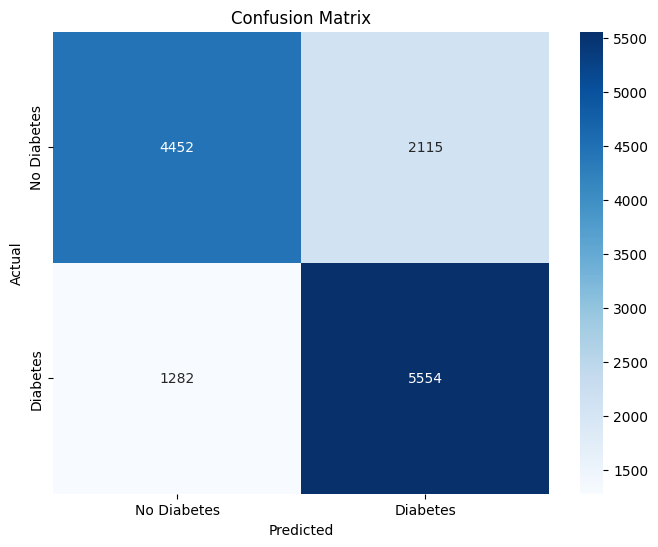

In [16]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1 style="
    font-size: 30px;
    background-color: #1a2a36;
    color: #4fd1c5; 
    font-family: 'Trebuchet MS', sans-serif;
    font-weight: bold;
    text-align: center;
    padding: 10px;
    transform: skew(-10deg); 
    display: inline-block;
    margin: 0px;
    border-radius: 8px;  
    border-left: 5px solid #4fd1c5; 
    text-shadow: 0 0 10px rgba(79, 209, 197, 0.5);  
    box-shadow: 0 4px 6px rgba(255, 255, 255, 0.1);      
">
Prediction</h1>

In [17]:
pred = [float(i) for i in input('Enter Values in This Order: {' + ', '.join(x_train.columns) + '}').split()]
# Scaling
pred = [(pred[i] - x_reduced.iloc[:,i].min()) / (x_reduced.iloc[:,i].max() - x_reduced.iloc[:,i].min()) for i in range(len(pred))]

# pred = []
# for feature in x_train.columns:
#     # Add Feature Value to Prediction List After Scaling it
#     # pred.append((float(input(f'Enter {feature}:')) - x_reduced[feature].min()) / (x_reduced[feature].max() - x_reduced[feature].min())) # -> User Input
#     pred.append((x_reduced[feature][0] - x_reduced[feature].min()) / (x_reduced[feature].max() - x_reduced[feature].min())) # -> Fetch from Data

# Final Pridiction
model.predict(pd.DataFrame([pred], columns=x_train.columns))
# 1 0 1 26 0 0 0 1 0 1 0 3 5 30 1 4 6 8

array([0.])

In [18]:
import joblib

# Save the model
joblib.dump(pred, 'Model.joblib')


['Model.joblib']

In [19]:
from flask import Flask, request, jsonify

app = Flask(__name__)
model = joblib.load('Model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # expects a JSON like {"input": [1.2, 3.4, 5.6]}
    input_features = data['input']
    prediction = model.predict([input_features])
    return jsonify({'prediction': prediction.tolist()})
